In [79]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc
import numpy as np
from matplotlib import pyplot as plt

In [169]:
# Function for initialising the vortex state.
def m_init_vortex(pos):
    x, y, z = pos[0]/1e-9, pos[1]/1e-9, pos[2]/1e-9
    x,y,z = x-62.5,y-62.5,z-62.5
    theta = np.arctan2(x,y)
    
    mx = -np.cos(theta)
    my = np.sin(theta)
    mz = 0

    return (mx, my, mz)

def Ms_fun(pos):
    x, y, z = pos[0]/1e-9, pos[1]/1e-9, pos[2]/1e-9
    Km = 1e6  # magnetostatic energy density (J/m**3)
    Ms = np.sqrt(2*Km/mm.consts.mu0)
    N = 32
    #print(x,y,z)
    if abs(62.5-x) > 50 or abs(62.5-y) > 50 or abs(62.5-z) > 50:
        Ms = 0
        
    return Ms

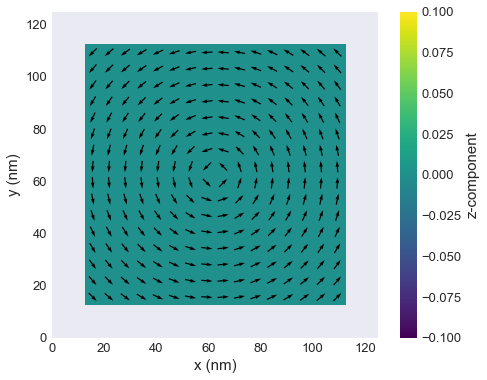

In [170]:
L = 8
m_init = m_init_vortex
N = 20  # discretisation in one dimension
cubesize = 20/16*100*1e-9  # cube edge length (m)
cellsize = cubesize/N  # discretisation in all three dimensions.
lex = cubesize/L  # exchange length.

Km = 1e6  # magnetostatic energy density (J/m**3)
Ms = np.sqrt(2*Km/mm.consts.mu0)  # magnetisation saturation (A/m)
A = 0.5 * mm.consts.mu0 * Ms**2 * lex**2  # exchange energy constant
K = 0.1*Km  # Uniaxial anisotropy constant
u = (0, 0, 1)  # Uniaxial anisotropy easy-axis

p1 = (0, 0, 0)  # Minimum sample coordinate.
p2 = (cubesize, cubesize, cubesize)  # Maximum sample coordinate.
cell = (cellsize, cellsize, cellsize)  # Discretisation.
mesh = df.Mesh(p1=(0, 0, 0), p2=(cubesize, cubesize, cubesize),
               cell=(cellsize, cellsize, cellsize))  # Create a mesh object.

system = mm.System(name='stdprob3')
system.energy = mm.Exchange(A=A) + mm.UniaxialAnisotropy(K=K, u=u) + mm.Demag()
system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms_fun)

system.m.plane('z').mpl()

In [171]:
def minimise_system_energy(L, m_init):
    print("L={:7}, {} ".format(L, m_init.__name__), end="")
    N = 20  # discretisation in one dimension
    cubesize = 20/16*100*1e-9  # cube edge length (m)
    cellsize = cubesize/N  # discretisation in all three dimensions.
    lex = cubesize/L  # exchange length.

    Km = 1e6  # magnetostatic energy density (J/m**3)
    Ms = np.sqrt(2*Km/mm.consts.mu0)  # magnetisation saturation (A/m)
    A = 0.5 * mm.consts.mu0 * Ms**2 * lex**2  # exchange energy constant
    K = 0.1*Km  # Uniaxial anisotropy constant
    u = (0, 0, 1)  # Uniaxial anisotropy easy-axis

    p1 = (0, 0, 0)  # Minimum sample coordinate.
    p2 = (cubesize, cubesize, cubesize)  # Maximum sample coordinate.
    cell = (cellsize, cellsize, cellsize)  # Discretisation.
    mesh = df.Mesh(p1=(0, 0, 0), p2=(cubesize, cubesize, cubesize),
                   cell=(cellsize, cellsize, cellsize))  # Create a mesh object.

    system = mm.System(name='stdprob3')
    system.energy = mm.Exchange(A=A) + mm.UniaxialAnisotropy(K=K, u=u) + mm.Demag()
    system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms_fun)

    md = oc.MinDriver()
    md.drive(system, overwrite=True)

    return system

In [172]:
system = minimise_system_energy(8, m_init_vortex)

L=      8, m_init_vortex Running OOMMF (TclOOMMFRunner) [2021/04/27 15:47]... (9.9 s)


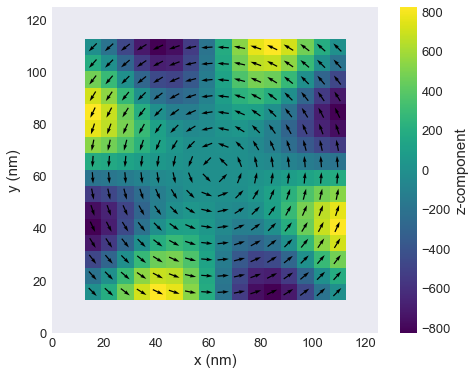

In [173]:
system.m.plane('z').mpl()

In [161]:
system.m.k3d_vector(color_field=system.m.z)

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[2, -3, 0.2, 0.0, 0…

Output()

In [174]:
arr = system.m.array
np.save('phantom/vortex_cube_L8.npy',arr)

In [175]:
system.m.orientation.mesh.region, system.m.orientation.mesh.n

(Region(p1=(0.0, 0.0, 0.0), p2=(1.2500000000000002e-07, 1.2500000000000002e-07, 1.2500000000000002e-07)),
 (20, 20, 20))

In [29]:
system.m.orientation.mesh

Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 1e-07, 1e-07)), n=(16, 16, 16), bc='', subregions={})